In [128]:
import pytesseract
from PIL import Image
import cv2
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract'

def ocr(img_path):
    path = str(img_path)+'.png'
    # print(path)
    img_cv = cv2.imread(path)
    img_rgb=cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
    # img_rgb=cv2.cvtColor(img_cv, cv2.IMREAD_GRAYSCALE)
    config = ('-l kor+Eng --oem 1 --psm 6')
    recognized_text = pytesseract.image_to_string(img_rgb,config=config)
    # recognized_text = recognized_text.replace("\n", " ")

    # Print the processed text

    return print(recognized_text)

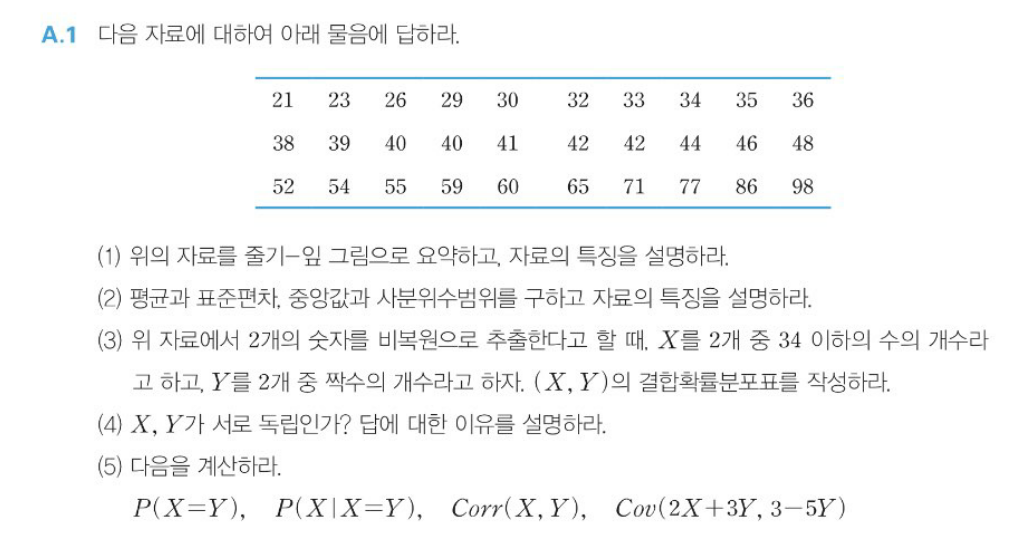

# A.1 
다음 자 료 에 대하여 아래 물 음 에 답 하 라 .<br>
21 23 26 29 30 32 33 34 35 36 <br>
38 39 40 40 41 42 42 44 46 48 <br>
52 54 55 59 60 65 71 77 86 98 <br>

(1) 위 의 자 료 를 줄 기 - 잎 그 림 으로 요 약 하고, 자 료 의 특 징 을 설 명 하라.<br>
(2) 평 균 과 표 준 편차, 중 앙 값 과 사 분 위 수 범 위 를 구하고 자 료 의 특 징 을 설 명 하라.<br>
(3) 위 자 료 에서 2 개 의 숫 자 를 비 복 원 으로 추 출 한 다고 할 때, X 를 2 개 중 34 이 하 의 수 의 개 수 라고 하고,Y 를 2 개 중 짝 수 의 개 수 라고 하자. (X, Y) 의 결합 확률 분포표 를 작 성 하라.<br>
(4) X, Y 가 서로 독 립 인가? 답 에 대한 이 유 를 설 명 하라.<br>
(5) 다 음 을 계 산 하라.<br>
P(X=Y), P(X|X=Y), Corr(X,Y), Cov(2X+3Y, 3-5Y)

In [16]:
import numpy as np
data = np.array(
        [21,23,26,29,30,32,33,34,35,36,38,
          39,40,40,41,42,42,44,46,48,
          52,54,55,59,60,65,71,77,86,98])
(data//10)

array([2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 6, 6, 7, 7, 8, 9], dtype=int32)

In [26]:
m,s,med= data.mean(), data.std(), np.median(data)
q1,q2,q3 = np.quantile(data,0.25),np.quantile(data,0.5),np.quantile(data,0.75)
print(f'평균:{m:.3f}, 표준편차:{s:.3f}, 중앙값:{med:.3f},\n1사분위{q1}, 2사분위{q2}, 3사분위{q3}')

평균:46.533, 표준편차:18.136, 중앙값:41.500,
1사분위34.25, 2사분위41.5, 3사분위54.75


In [67]:
import math
n = len(data)

# X: 2개 중 34 이하의 수의 개수
# Y: 2개 중 짝수의 개수
prob_table = [[0] * 3 for _ in range(3)]

for x in range(3):
    for y in range(3):
        count = 0
        for i in range(n):
            for j in range(i+1, n):
                if (((data[i] <= 34).sum() + (data[j] <= 34).sum()) == x) and (((data[i] % 2 == 0).sum() + (data[j] % 2 == 0).sum()) == y):
                    count += 1
        
        # 확률 계산
        total_cases = math.comb(n, 2)
        prob_table[x][y] = count / total_cases

print("결합 확률 분포표:")
print("      Y")
print("X     0     1     2")
for x in range(3):
    print(f"{x}  {prob_table[x][0]:.3f} {prob_table[x][1]:.3f} {prob_table[x][2]:.3f}")

결합 확률 분포표:
      Y
X     0     1     2
0  0.064 0.257 0.209
1  0.074 0.202 0.129
2  0.014 0.037 0.014


In [70]:
# X의 주변 확률 분포
p_x = [sum(row) for row in prob_table]
print("X의 주변 확률 분포:", p_x)

# Y의 주변 확률 분포
p_y = [sum(row) for row in zip(*prob_table)]
print("Y의 주변 확률 분포:", p_y)

# 독립 여부 확인
independent = True
for x in range(3):
    for y in range(3):
        expected_prob = p_x[x] * p_y[y]
        if abs(prob_table[x][y] - expected_prob) > 1e-6:
            independent = False
            break

if independent:
    print("X와 Y는 서로 독립입니다.")
else:
    print("X와 Y는 서로 독립이 아닙니다.")

X의 주변 확률 분포: [0.5310344827586206, 0.4045977011494253, 0.06436781609195402]
Y의 주변 확률 분포: [0.15172413793103448, 0.496551724137931, 0.3517241379310345]
X와 Y는 서로 독립이 아닙니다.


In [74]:
from scipy.stats import chi2_contingency
stats,p_val,_,_ =chi2_contingency([p_x,p_y])
p_val

0.8111674556592224

카이제곱검정의 독립성검정으로도 p_value 가 0.81이 나옴. 독립이 아니다.

In [76]:
# P(X=Y)
p_x_eq_y = sum([prob_table[i][i] for i in range(3)])
print("P(X=Y) =", p_x_eq_y)

# P(X|X=Y)
p_x_given_x_eq_y = p_x_eq_y / sum(p_x)
print("P(X|X=Y) =", p_x_given_x_eq_y)

# E(X), E(Y)
e_x = sum([i * p_x[i] for i in range(3)])
e_y = sum([i * p_y[i] for i in range(3)])

# Var(X), Var(Y)
var_x = sum([(i - e_x)**2 * p_x[i] for i in range(3)])
var_y = sum([(i - e_y)**2 * p_y[i] for i in range(3)])

# Cov(X, Y)
cov_x_y = sum([(i - e_x) * (j - e_y) * prob_table[i][j] for i in range(3) for j in range(3)])

# Corr(X, Y)
corr_x_y = cov_x_y / (math.sqrt(var_x) * math.sqrt(var_y))
print("Corr(X, Y) =", corr_x_y)

# Cov(2X + 3Y, 3 - 5Y)
cov_2x_3y_3_5y = 2 * (-5) * cov_x_y + 3 * (-5) * var_y
print("Cov(2X + 3Y, 3 - 5Y) =", cov_2x_3y_3_5y)

P(X=Y) = 0.2804597701149425
P(X|X=Y) = 0.2804597701149425
Corr(X, Y) = -0.12309149097933275
Cov(2X + 3Y, 3 - 5Y) = -6.436781609195402


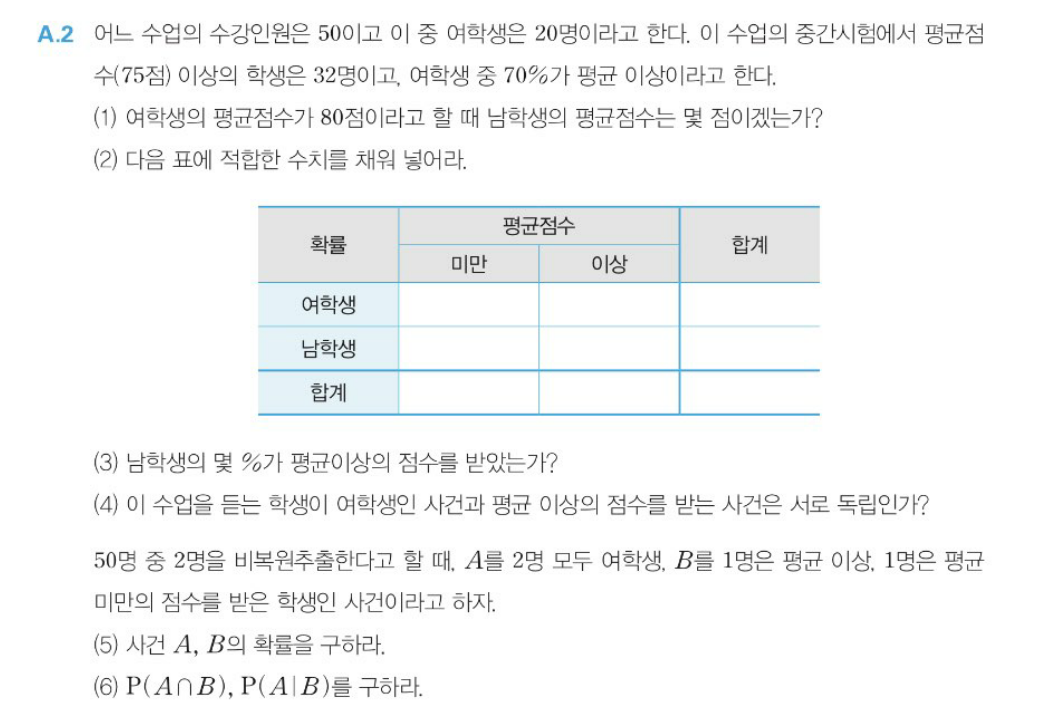

# A2
어느 수업의 수강 인원은 50이고 이중 여학생은 20 명이라고 한다. 이 수 업 의 중간 시험에서 평균 점
수(75점) 이상의 학생은 32명 이고, 여학생 중 70% 가 평균 이상 이라고 한다.<br>
(1) 여 학 생 의 평균 점수가 80 점 이라고 할 때 남학생의 평균점수는 몇점이겠는가?<br>
(2) 다음 표에 적합한 수치 를 채워 넣어라.<br>
(3) 남학생의 몇 %가 평균 이상의 점수를 받았는가?<br>
(4) 이 수업을 듣는 학생이 여학생인 사건과 평균 이상의 점수를 받는 사건은 서로 독립 인가?<br>
50 명 중 2명을 비복원 추출한다고 할 때. A를 2 명 모두 여학생, B를 1 명 은 평균 이상, 1 명 은 평균
미 만 의 점 수 를 받은 학 생 인 사 건 이라고 하자.<br>
(5) 사건 A, B의 확률 을 구하라.<br>
(6) $P(A\cap B)$, $P(A|B)$ 구하라.<br>

In [84]:
# x=여학생의수, y=평균이상의수
a,b,n = 20,32,50
# 여학생의 평균=80
print('남학생의 평균:',(50*75-a*80)/(n-a))

남학생의 평균: 71.66666666666667


In [89]:
# 평균이상 여학생의수, 평균이하여학생의 수 
0.7*a, a-0.7*a, b-0.7*a ,b-a

(14.0, 6.0, 18.0, 12)

In [90]:
# 남학생중 평균이상
18/32

0.5625

In [91]:
# 이 수업을 듣는 학생이 여학생인 사건과 평균 이상의 점수를 받는 사건은 서로 독립 인가?
print('여학생이면서 평균이상 점수 받는 수가 14명 존재, 독립이 아니다')

여학생이면서 평균이상 점수 받는 수가 14명 존재, 독립이 아니다


In [101]:
'''
50 명 중 2명을 비복원 추출한다고 할 때. 
A를 2 명 모두 여학생, B를 1 명 은 평균 이상, 1 명 은 평균 미 만 의 점 수 를 받은 학 생 인 사 건 
이라고 하자.'''

'\n50 명 중 2명을 비복원 추출한다고 할 때. \nA를 2 명 모두 여학생, B를 1 명 은 평균 이상, 1 명 은 평균 미 만 의 점 수 를 받은 학 생 인 사 건 \n이라고 하자.'

In [102]:
from math import comb

# 전체 학생 수
total_students = 50

# 남학생 수
male_students = 30
male_above_avg = 18
male_below_avg = 12

# 여학생 수
female_students = 20
female_above_avg = 14
female_below_avg = 6

# 전체 경우의 수
total_cases = comb(total_students, 2)

# 사건 A: 2명 모두 여학생인 경우
event_A_cases = comb(female_students, 2)
event_A_prob = event_A_cases / total_cases
print(f"P(A) = {event_A_prob:.3f}")

# 사건 B: 1명은 평균 이상, 1명은 평균 미만인 경우
above_avg_students = male_above_avg + female_above_avg
below_avg_students = male_below_avg + female_below_avg
event_B_cases = comb(above_avg_students, 1) * comb(below_avg_students, 1)
event_B_prob = event_B_cases / total_cases
print(f"P(B) = {event_B_prob:.3f}")

# P(A∩B) :2명 모두 여학생인데, 한명은 평균이상, 한명을 평균미만
event_A_and_B_cases = comb(female_above_avg, 1) * comb(female_below_avg, 1)
event_A_and_B_prob = event_A_and_B_cases / event_A_cases
print(f"P(A∩B) = {event_A_and_B_prob:.3f}")

# P(A|B)
event_A_given_B_prob = event_A_and_B_prob / event_B_prob
print(f"P(A|B) = {event_A_given_B_prob:.2f}")


P(A) = 0.155
P(B) = 0.470
P(A∩B) = 0.442
P(A|B) = 0.94


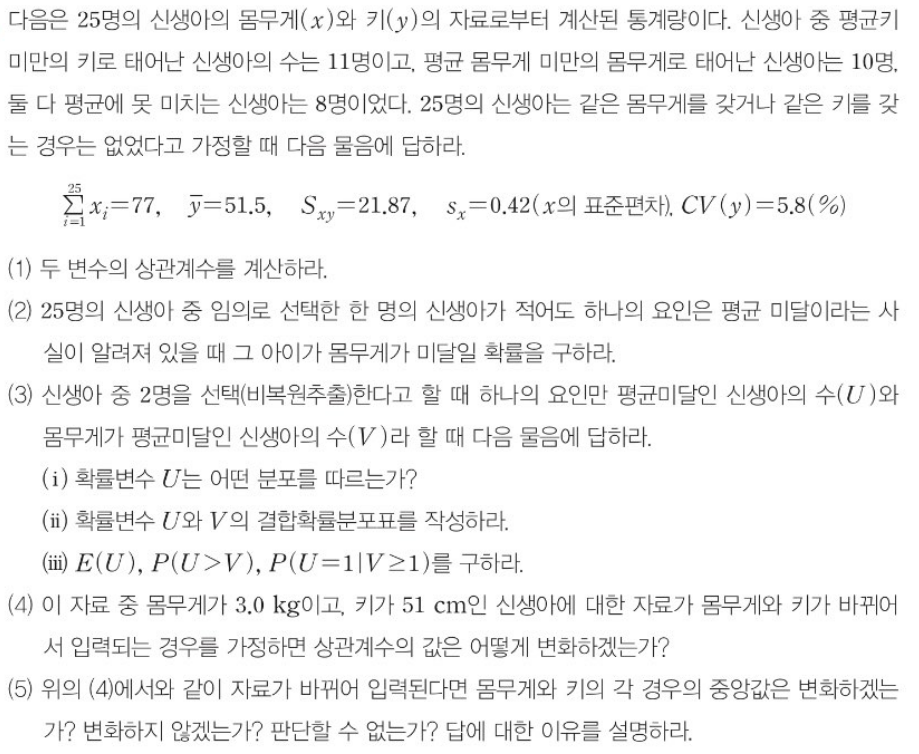

# 3
다 음 은 25 명 의 신 생 아 의 몸 무 게 (x) 와 키 (y) 의 자 료 로부터 계 산 된 통 계 량 이 다. 신생아 중 평 균 키 미 만 의 키로 태어난 신 생 아 의 수 는 11 명 이고, 평균 몸무게 미 만 의 몸 무 게 로 태어난 신 생 아 는 10 명 , 둘 다 평균 에 못 미치는 신 생 아 는 8 명 이었다. 25 명 의 신 생 아 는 같은 몸 무 게 를 갖거나, 같은 키 를 갖는 경 우 는 없었다고 가 정 할 때 다음 물 음 에 답 하 라 . <br>
$\sum^{25}_{i=1} x_i$ =77, $\bar y$=515, $S_{xy}$=21.87,$s_x$=0.42(x의 표준편차),$CV (y)$=5.8(%)<br>
(1) 두 변 수 의 상 관 계 수 를 계 산 하라.<br>
(2) 25 명 의 신생아 중 임의로 선택한 한 명의 신 생 아 가 적어도 하 나 의 요 인 은 평균 미 달 이라는 사실 이 알려져 있을 때 그 아 이 가 몸 무 게 가 미 달 일 SSS 구하라.<br>
(3) 신생아 중 2 명 을 선 택 ( 비 복 원 추 출 ) 한 다고 할 때 하 나 의 요 인 만 평 균 미 달 인 신 생 아 의 수 (U) 와몸 무 게 가 평 균 미 달 인 신 생 아 의 수 (V) 라 할 때 다음 물 음 에 답 하 라 .<br>
(i) 확 률 변수 (U) 는 어떤 분 포 를 따 르 는 가?<br>
(ii) 확 률 변수 U 와 V의 결 합 확 률 분 포 표 를 작 성 하라.<br>
(iii) E(U), P(U>V), P(U=1|V>=1)를 구하라.<br>
(4) 이 자료 중 몸무게가 3.0kg이고, 키 가 51cm인 신 생 아 에 대한 자 료 가 몸 무 게 와 키 가 바뀌어서 입력되는 경 우 를 가 정 하면 상 관 계 수 의 값은 어떻게 변 화 하겠는가?<br>
(5) 위 의 (4) 에 서 와 같이 자 료 가 바뀌어 입 력 된 다면 몸 무 게 와 키 의 각 경 우 의 중 앙 값 은 변 화 하 겠 는가? 변 화 하지 않겠는가? 판 단 할 수 없는가? 답 에 대한 이유를 설 명 하라.<br>

In [107]:
s_xy,s_x = 21.87,0.42
s_y = 51.5*5.8/100
corr = s_xy/(s_x*s_y)
corr

17.432684489932566

In [110]:
# 2명 비복원 하나의 요인만 평균미달인 신생아의수U, 몸무게 평균미만인 신생아수V
from math import comb

w_below = 2
wh_below = 8
h_below = 3
wh_above = 12
n = 25
all_case = comb(n,2)
u = comb(w_below+h_below,2)
v = comb(w_below+wh_below,2)
u,v

(10, 45)

In [118]:
x =77/25
x_ = (x*24+51)/25
y=51.5
y_ = (y*24+3)/25
x,y,x_,y_

(3.08, 51.5, 4.9968, 49.56)

x, y 각각의 변동성이 커지기에 표준편차가 커지지만 공분산은 달라지지 않는다.
따라서 상관계수는 줄어든다

In [113]:
print("중앙값은 변화하지 않는다, 이상치이기 때문")

중앙값은 변화하지 않는다, 이상치이기 때문


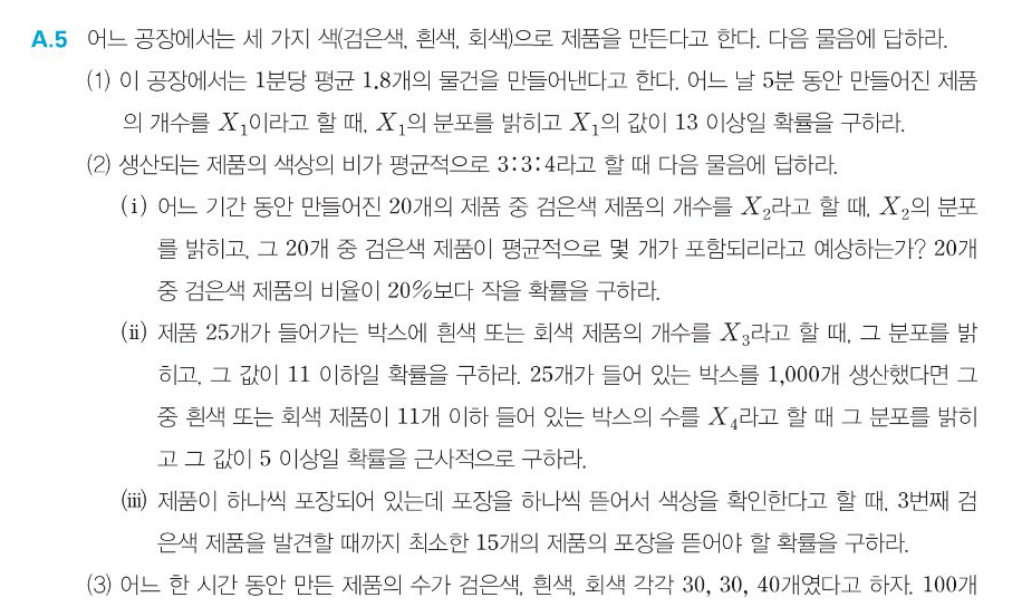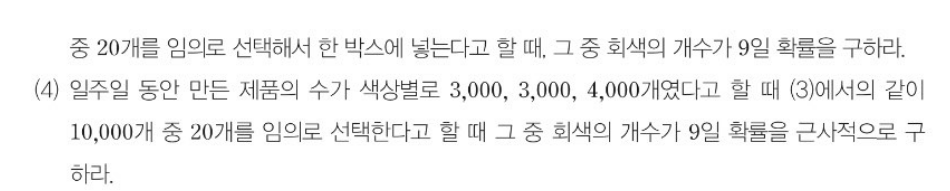

# 5.
어느공장에서 세가지색(검,흰,회) 제품만든다.

In [120]:
# 1. 1분당1.8개의 물건만들때, 5분동안 만들어진수x, 13이상 될 확률?
from scipy.stats import poisson
lamda = 1.8*5
1- poisson.cdf(13,lamda)

0.07385076930791168

In [121]:
# 20개중 검정색 제품의 기대값
# 검:흰:회 = 3:3:4
0.3*20

6.0

In [122]:
# 검정색 제품이 20% 이하일 확률 
lamda = 0.3
poisson.cdf(0.2,lamda)

0.740818220681718

In [125]:
# 25개 박스, 흰/회색 개수 11이하일 확률
from scipy.stats import binom
x,n,p=11,25,0.7
binom.cdf(x,n,p)

0.005993987583818519

In [127]:
# 1000개 생산시, 5개 이하일 확률
lamda = binom.cdf(x,n,p)*1000
poisson.cdf(5,lamda)

0.44664585775531984

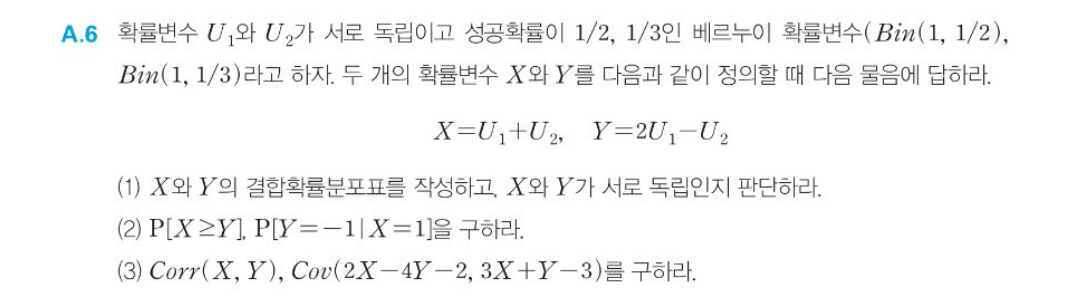

6. 확률변수 U1 와 U2 가 서로 독립이고 성공확률 이 1/2, 1/3 인 베르누이 확률변수 <br>
Bin(1, 1/2),Bin(1, 1/3) 라 고 하자. 두 개의 확 률 변수 X, Y를 다 음 과 같이 정 의 할 때 다음 물 음 에 답 하 라 .<br>
X=U1+U2, Y = 2U1-U2<br>
(1) X,Y의 결합확률분포표를 작성하고 X,Y가 서로 독립 인지 판단 하라.<br>
(2) P(X>=Y), P(Y=—1|X=1)을 구하라.<br>
(3) Corr(X, Y), Cov(2X-4Y-2, 3X+Y-3)을 구하라.<br>

In [140]:
from itertools import product
p1, p2 = 1/2,1/3
q1, q2 = 1-p1,1-p2
# X와 Y의 가능한 값
{'x': [0, 1, 2],
'y': [-1, 0, 1, 2]}
# X와 Y의 결합확률분포표
pmf_xy = {(x, y): 0 for x in range(3) for y in range(-1, 3)}
pmf_xy[(0, 0)] = 1/3
pmf_xy[(0, 1)] = 1/6
pmf_xy[(1, -1)] = 1/6
pmf_xy[(1, 0)] = 1/3
pmf_xy[(1, 1)] = 1/6
pmf_xy[(2, -1)] = 1/6
pmf_xy[(2, 0)] = 1/6
pmf_xy[(2, 1)] = 1/6
pmf_xy[(2, 2)] = 1/6

print(f'X와 Y의 결합확률분포: {pmf_xy}')

# X와 Y의 주변확률분포
pmf_x = [sum(pmf_xy[x, y] for y in range(-1, 3)) for x in range(3)]
pmf_y = [sum(pmf_xy[x, y] for x in range(3)) for y in range(-1, 3)]
print(f'X의 주변확률분포: {pmf_x}')
print(f'Y의 주변확률분포: {pmf_y}')

# X와 Y가 독립인지 확인 : 결합확률분포와 주변확률분포 비교
independent = all(pmf_xy[x, y] == pmf_x[x] * pmf_y[y+1] for x, y in product(range(3), range(-1, 3)))
print("X와 Y는 독립인가?", independent)

X와 Y의 결합확률분포: {(0, -1): 0, (0, 0): 0.3333333333333333, (0, 1): 0.16666666666666666, (0, 2): 0, (1, -1): 0.16666666666666666, (1, 0): 0.3333333333333333, (1, 1): 0.16666666666666666, (1, 2): 0, (2, -1): 0.16666666666666666, (2, 0): 0.16666666666666666, (2, 1): 0.16666666666666666, (2, 2): 0.16666666666666666}
X의 주변확률분포: [0.5, 0.6666666666666666, 0.6666666666666666]
Y의 주변확률분포: [0.3333333333333333, 0.8333333333333333, 0.5, 0.16666666666666666]
X와 Y는 독립인가? False


In [143]:
import math

# X와 Y의 결합확률분포표 계산
def joint_pmf(x, y):
    if x == 0:
        if y == 0:
            return 1/3
        elif y == 1:
            return 1/6
        else:
            return 0
    elif x == 1:
        if y == -1:
            return 1/6
        elif y == 0:
            return 1/3
        elif y == 1:
            return 1/6
        else:
            return 0
    else:  # x == 2
        if y == -1:
            return 1/6
        elif y == 0:
            return 1/6
        elif y == 1:
            return 1/6
        elif y == 2:
            return 1/6
        else:
            return 0

# P(X≥Y) 계산
p_x_geq_y = sum(joint_pmf(x, y) for x in range(3) for y in range(-1, 3) if x >= y)
print("P(X≥Y) =", p_x_geq_y)

# P(Y=-1|X=1) 계산
p_y_eq_minus1_given_x_eq_1 = joint_pmf(1, -1) / sum(joint_pmf(1, y) for y in range(-1, 3))
print("P(Y=-1|X=1) =", p_y_eq_minus1_given_x_eq_1)

P(X≥Y) = 1.6666666666666667
P(Y=-1|X=1) = 0.25


In [146]:
# E(X), E(Y), Var(X), Var(Y) 계산
exp_x = sum(x * pmf_x[x] for x in range(3))
exp_y = sum((y-1) * pmf_y[y] for y in range(4))
var_x = sum((x - exp_x)**2 * pmf_x[x] for x in range(3))
var_y = sum((y - 1 - exp_y)**2 * pmf_y[y] for y in range(4))
# Cov(X, Y) 계산
cov_xy = sum((x - exp_x) * (y - 1 - exp_y) * joint_pmf(x, y-1) for x in range(3) for y in range(4))

# Corr(X, Y) 계산
corr_xy = cov_xy / (math.sqrt(var_x) * math.sqrt(var_y))
print("cov_xy(X, Y) =", cov_xy)
print("Corr(X, Y) =", corr_xy)

cov_xy(X, Y) = 0.09722222222222227
Corr(X, Y) = 0.13164268547907051


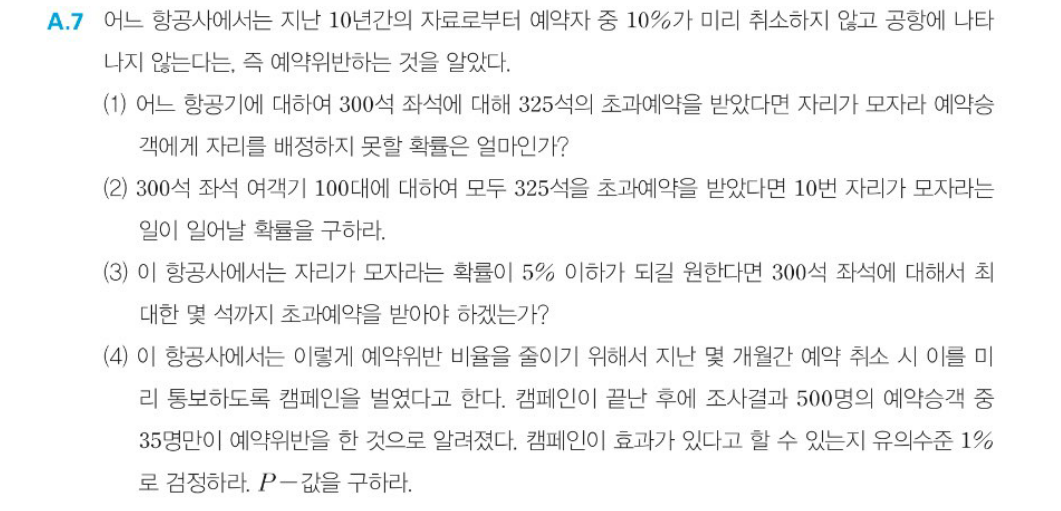

# 7.
어느 항공사에서는 지난 10년간의 자료로부터 예약자중 10%가 미리 취소하지 않고 공항에 나타나지 않는다는, 즉 예약위반 하는 것을 알았다.


In [166]:
# 1. 300석 좌석 대해 325석 초과예약 받은 경우 예약객에게 배정하지 못할 확률
from scipy.stats import poisson
lamda = 0.1*300
poisson.cdf(25,lamda)

0.20835736466733296

In [160]:
# 2. 1번과 같은 비행기 100대 중 10대 자리가 부족할 확률
from scipy.stats import binom,poisson
lamda = 0.1*300
x, n, p = 10, 100, poisson.cdf(25,lamda)
binom.pmf(x, n, p)

0.001967973373072557

In [168]:
# 3. 자리 모자라는 확률 5% 이하가 되길 원한다면 300석 좌석 대해 몇석까지 초과예약?

from scipy.stats import binom

n = 300  # 총 좌석 수
p = 0.1  # 예약 위반 확률

# 자리가 모자랄 확률이 0.05 이하가 되는 초과 예약 인원 찾기
for x in range(n+1):
    prob = 1 - binom.cdf(x-1, n, p)  # 자리가 모자랄 확률
    if prob <= 0.05:
        break

print(f"초과 예약 인원: {x}")
print(f"자리가 모자랄 확률: {prob:.4f}")

초과 예약 인원: 40
자리가 모자랄 확률: 0.0378


In [184]:
# 캠페인후 500명중 35명이 위반, 효과 있었는지 유의수준 1%로 검증하라
from scipy.stats import binom
# 관측값
n = 500  # 총 예약자 수
x = 35   # 예약 위반자 수
# 기존 위반 확률
p0 = 0.1

# 이항분포
prob = binom.pmf(x, n, p0)

# 유의수준 1%에서 임계값 
alpha = 0.01
critical_value = binom.ppf(1 - alpha, n, p0) 

# 결과 출력
print(f"관측된 예약 위반자 수: {x}명")
print(f"유의수준 1%의 임계값: {critical_value}명\n")

print(f"기존 위반 확률(p0): {p0}")
print(f"관측된 위반 확률: {x/n:.4f}\n")
print(f"이항분포 p-value: {prob:.4f}")

if x <= critical_value:
    print("귀무가설(H0) 기각: 캠페인 효과 있음")
else:
    print("귀무가설(H0) 기각못함: 캠페인 효과 없음")

관측된 예약 위반자 수: 35명
유의수준 1%의 임계값: 66.0명

기존 위반 확률(p0): 0.1
관측된 위반 확률: 0.0700

이항분포 p-value: 0.0044
귀무가설(H0) 기각: 캠페인 효과 있음


# 8
폐암과 흡연의 관계를 알아보기 위해 폐암환자 450명, 대조그룹 450명을 대상으로 다음과 같은 자료를 얻었다. 

In [187]:
import pandas as pd
df = pd.DataFrame({'흡연':[413,370],'비흡연':[36,80]},index=['폐암환자','대조그룹'])
df

,흡연,비흡연
폐암환자,413,36
대조그룹,370,80


(1)폐암환자의 흡연비율이 대조그룹의 흡연 비율과 다르다고 할 수 있는지 유의수준 5%로 카이제곱검정을 시행하라

In [190]:
from scipy.stats import chi2_contingency
H0 = '폐암환자의 흡연비율이 대조그룹의 흡연 비율과 차이가 없다'
H1 = '폐암환자의 흡연비율이 대조그룹의 흡연 비율과 다르다'

stats, p_val, ddof, exp = chi2_contingency(df)
print(f'p_values : {p_val}')
if p_val<0.05 : print(H1)
else: print(H0)

p_values : 1.9977482900030996e-05
폐암환자의 흡연비율이 대조그룹의 흡연 비율과 다르다


(2) 폐암환자의 흡연비율이 대조그룹의 흡연비율보다 높다고 할수있는지유의수준 5%로 정규분포를 이용한 검정을 시행하라

In [195]:
from scipy.stats import norm
n1,n2 = 413+36, 370+80
p1, p2 = 413/n1, 370/n2

se = math.sqrt(p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2)
z = (p1 - p2) / se

alpha = 0.05
z_critical = norm.ppf(1 - alpha)  

# 결과 출력
print(f"폐암환자의 흡연 비율: {p1:.4f}")
print(f"대조그룹의 흡연 비율: {p2:.4f}")
print(f"검정통계량(z): {z:.4f}")
print(f"임계값(z_critical): {z_critical:.4f}")

if z > z_critical:
    print("귀무가설(H0) 기각: 폐암환자의 흡연 비율이 대조그룹보다 높다.")
else:
    print("귀무가설(H0) 기각 못함: 폐암환자의 흡연 비율이 대조그룹과 다르지 않다.")

폐암환자의 흡연 비율: 0.9198
대조그룹의 흡연 비율: 0.8222
검정통계량(z): 4.4132
임계값(z_critical): 1.6449
귀무가설(H0) 기각: 폐암환자의 흡연 비율이 대조그룹보다 높다.


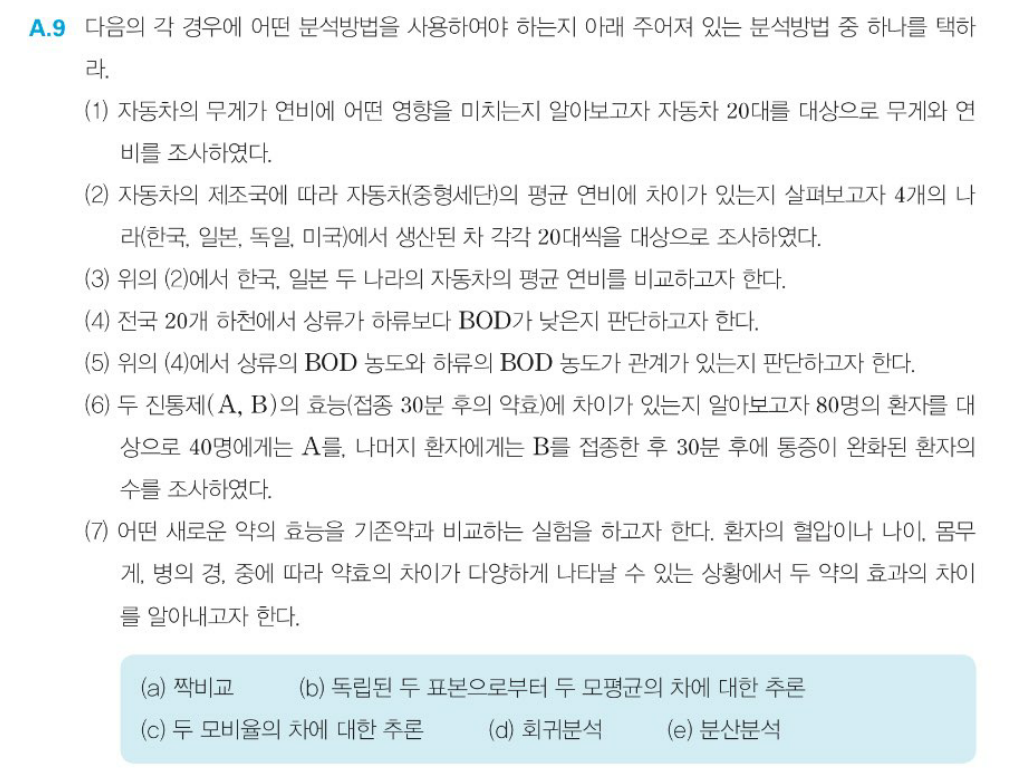

회귀분석

분산분석

독립된 두 표본으로부터 두 모평균차 추론

짝비교

짝비교

짝비교

짝비교

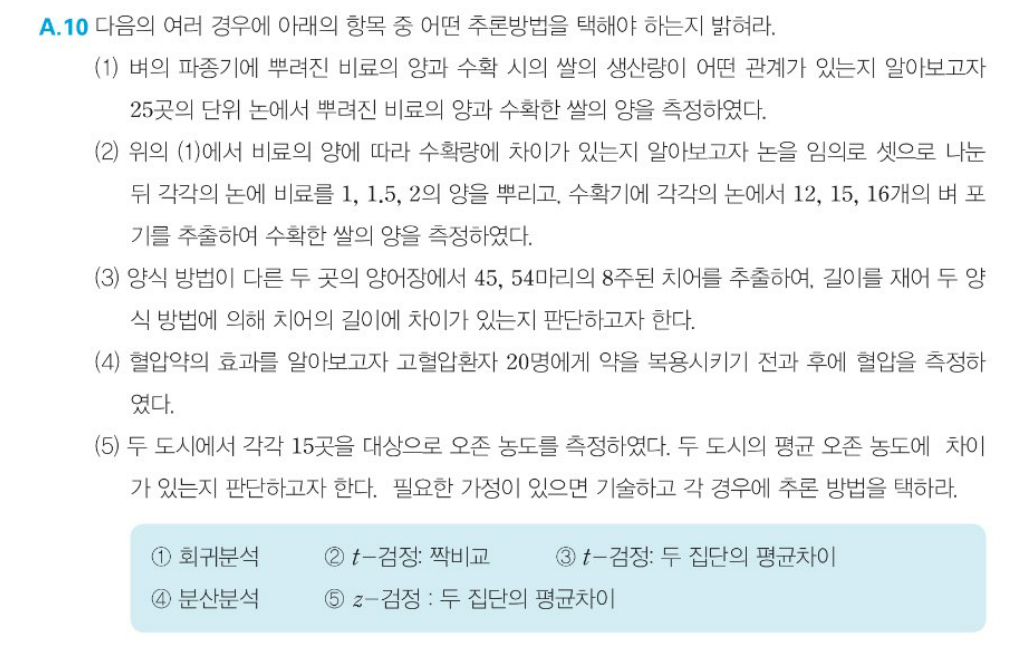

회귀분석

분산분석

z검정

짝비교

t검정